In [1]:
import pandas as pd
import numpy as np
import random
import torch
import os
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from utils import Patience
from models.Losses import *
from models.TabNets import TabNets
from models.SeqNets import SeqNets
from models.NeutralAD import SeqNeutralAD,TabNeutralAD
from models.NeutralAD_trainer import NeutralAD_trainer


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [4]:
train[train.type==4]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
1473,1.20,35.93,0.7,15.57,1274.0,54.16,2.71,4
1474,1.26,36.73,0.7,16.35,1338.0,54.87,2.74,4
1475,2.48,52.85,0.7,32.12,2628.0,69.20,3.46,4
1476,1.69,42.34,0.7,21.84,1787.0,59.86,2.99,4
1477,1.95,45.81,0.7,25.24,2065.0,62.94,3.15,4
...,...,...,...,...,...,...,...,...
1774,2.75,56.34,0.7,35.53,2907.0,72.30,3.62,4
1775,1.68,42.30,0.7,21.80,1784.0,59.82,2.99,4
1776,1.23,36.31,0.7,15.95,1305.0,54.50,2.73,4
1777,1.43,38.86,0.7,18.44,1509.0,56.77,2.84,4


In [5]:
container = [train, test]

In [6]:
config_dict = {'model': TabNeutralAD,
'trainer': NeutralAD_trainer,
'network': TabNets,
'device': 'cuda',
'learning_rate': 0.001,
'training_epochs': 1500,
'enc_hdim': 24,
'enc_nlayers': 5,
'num_trans': 5,
'trans_nlayers': 2,
'trans_type': 'mul',
'loss': DCL,
'enc_bias': False,
'batch_norm': False,
'loss_temp': 0.1,
'l2': 1e-05,
'optimizer': Adam,
'scheduler': {'class': StepLR, 'args': {'step_size': 100, 'gamma': 0.5}},
'shuffle': True,
'num_repeat': 8,
'save_scores': True,
'result_folder': 'RESULTS/RESULTS_',
'seed' : 17}

In [7]:
class data:
    num_cls = 8
    data = container

In [8]:
class configuration:
    def __init__(self, dict):
        self.cfg = dict

config = configuration(config_dict).cfg

In [9]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed) 
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(config['seed'])

In [10]:
from evaluation.Experiments import runExperiment
from evaluation.Kvariants_Eval import KVariantEval

def EndtoEnd_Experiments(model_config, dataset):

    result_folder = model_config['result_folder']

    exp_class = runExperiment
    risk_assesser = KVariantEval(dataset, result_folder, model_config)

    risk_assesser.risk_assessment(exp_class)

In [11]:
EndtoEnd_Experiments(config, data)

Epoch: 1, TR loss: 1.6536034478081598
Epoch: 10, TR loss: 0.7621952339454934
Epoch: 20, TR loss: 0.7164007822672526
Epoch: 30, TR loss: 0.4585309558444553
Epoch: 40, TR loss: 0.38464991251627606
Epoch: 50, TR loss: 0.37391478927047167
Epoch: 60, TR loss: 0.3653558095296224
Epoch: 70, TR loss: 0.35813561192265264
Epoch: 80, TR loss: 0.3544772819236473
Epoch: 90, TR loss: 0.3524161091557256
Epoch: 100, TR loss: 0.3513083987765842
Epoch: 110, TR loss: 0.35060674172860606
Epoch: 120, TR loss: 0.3502809030038339
Epoch: 130, TR loss: 0.3500329123602973
Epoch: 140, TR loss: 0.3498617808024089
Epoch: 150, TR loss: 0.34974313665319373
Epoch: 160, TR loss: 0.34965734128598813
Epoch: 170, TR loss: 0.34959178500705296
Epoch: 180, TR loss: 0.34954071044921875
Epoch: 190, TR loss: 0.3494959230776186
Epoch: 200, TR loss: 0.3494373604103371
Epoch: 210, TR loss: 0.34937095642089844
Epoch: 220, TR loss: 0.3487263079042788
Epoch: 230, TR loss: 0.3492990423131872
Epoch: 240, TR loss: 0.32743139620180484
E

In [7]:
import json
df_container = []
for i in range(8):
    with open(f'./RESULTS/RESULTS_/{i}_CLS/scores_labels.json') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
        df_container.append(df)

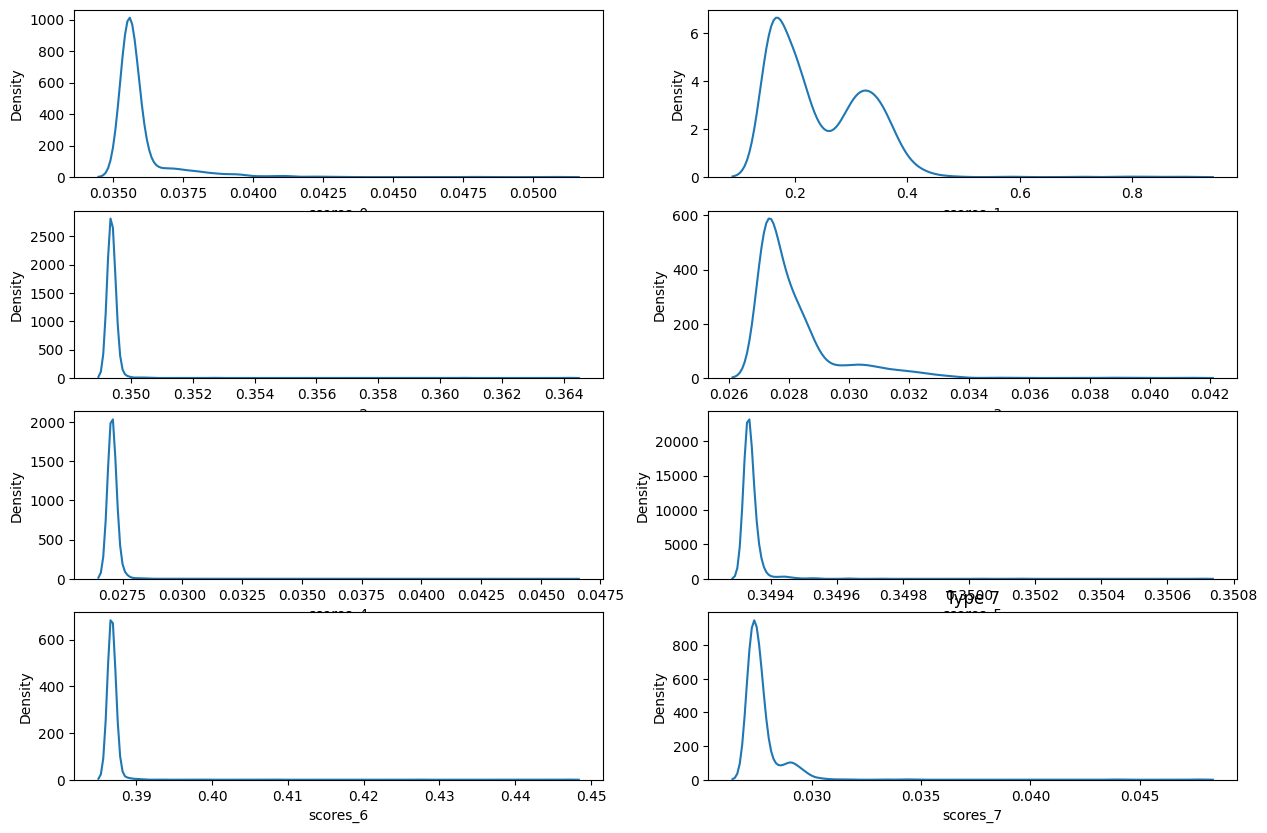

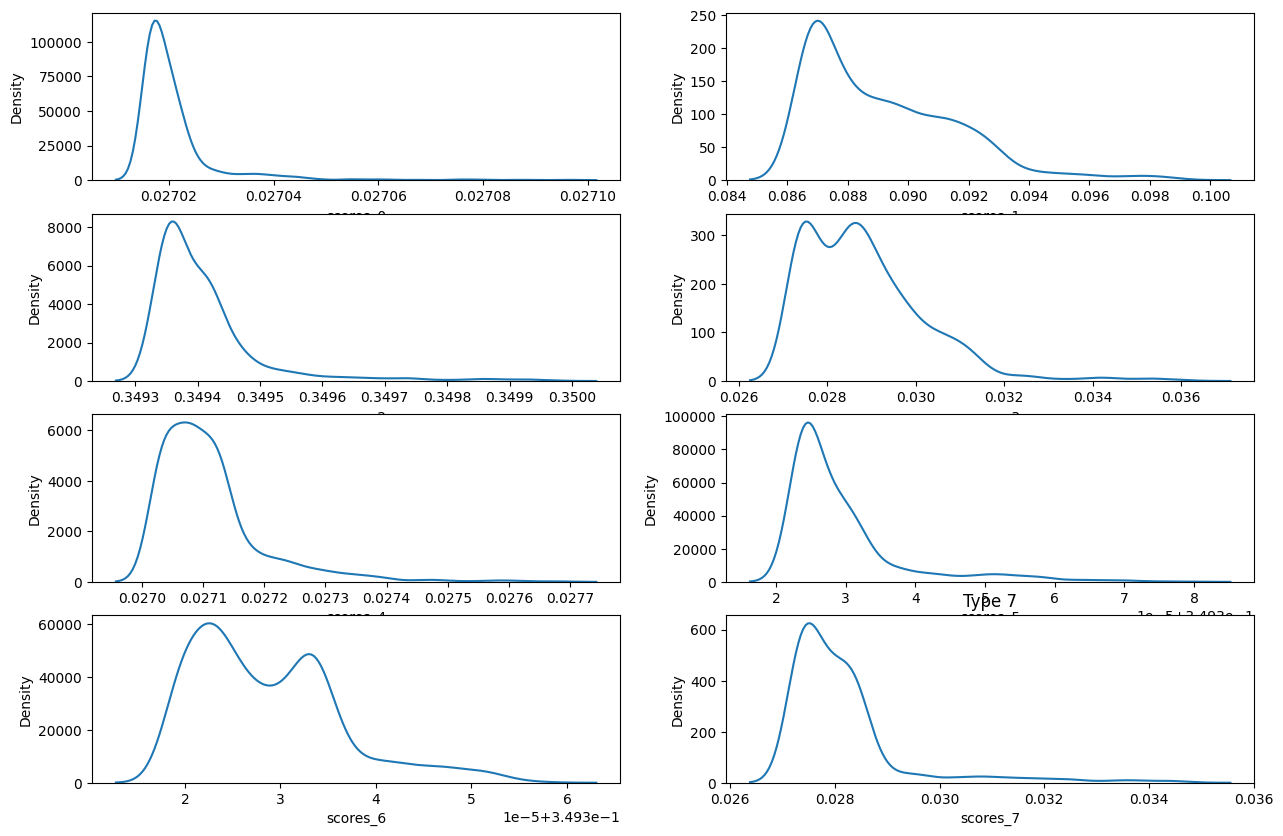

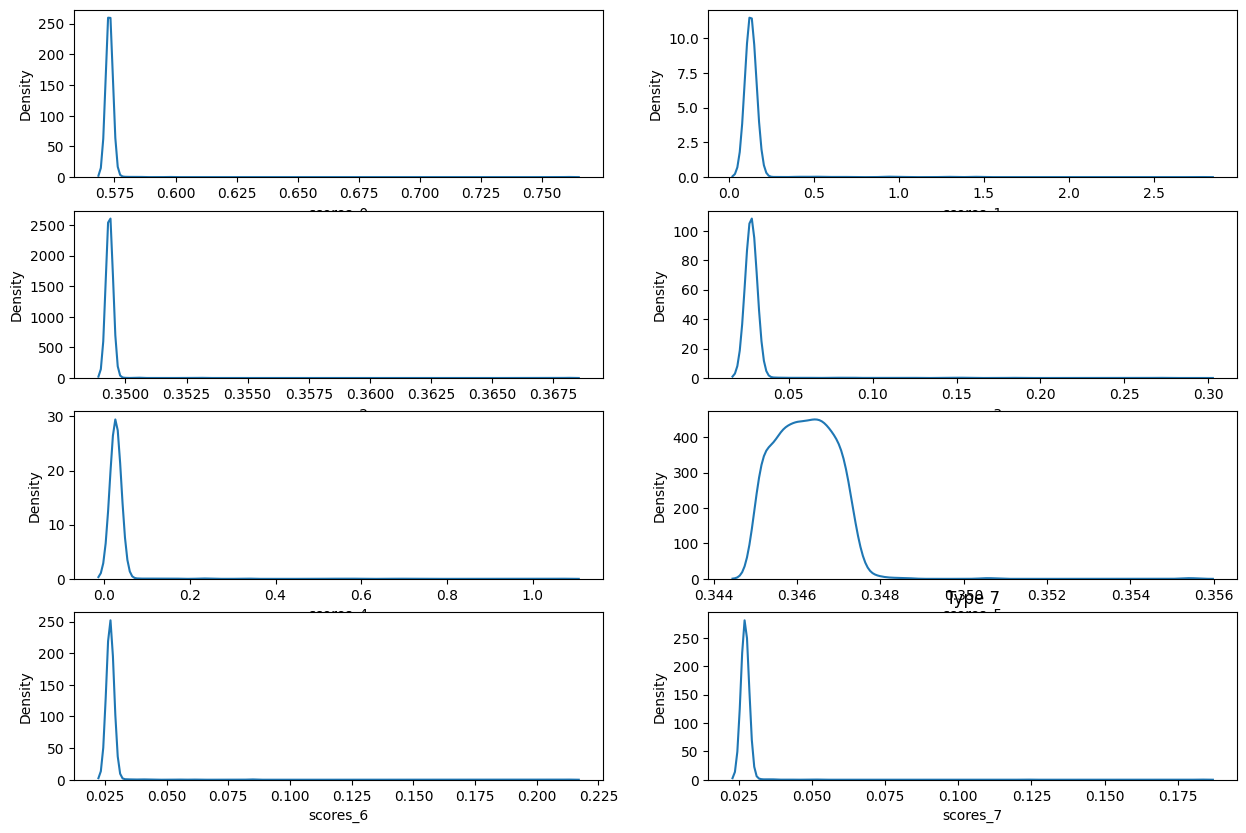

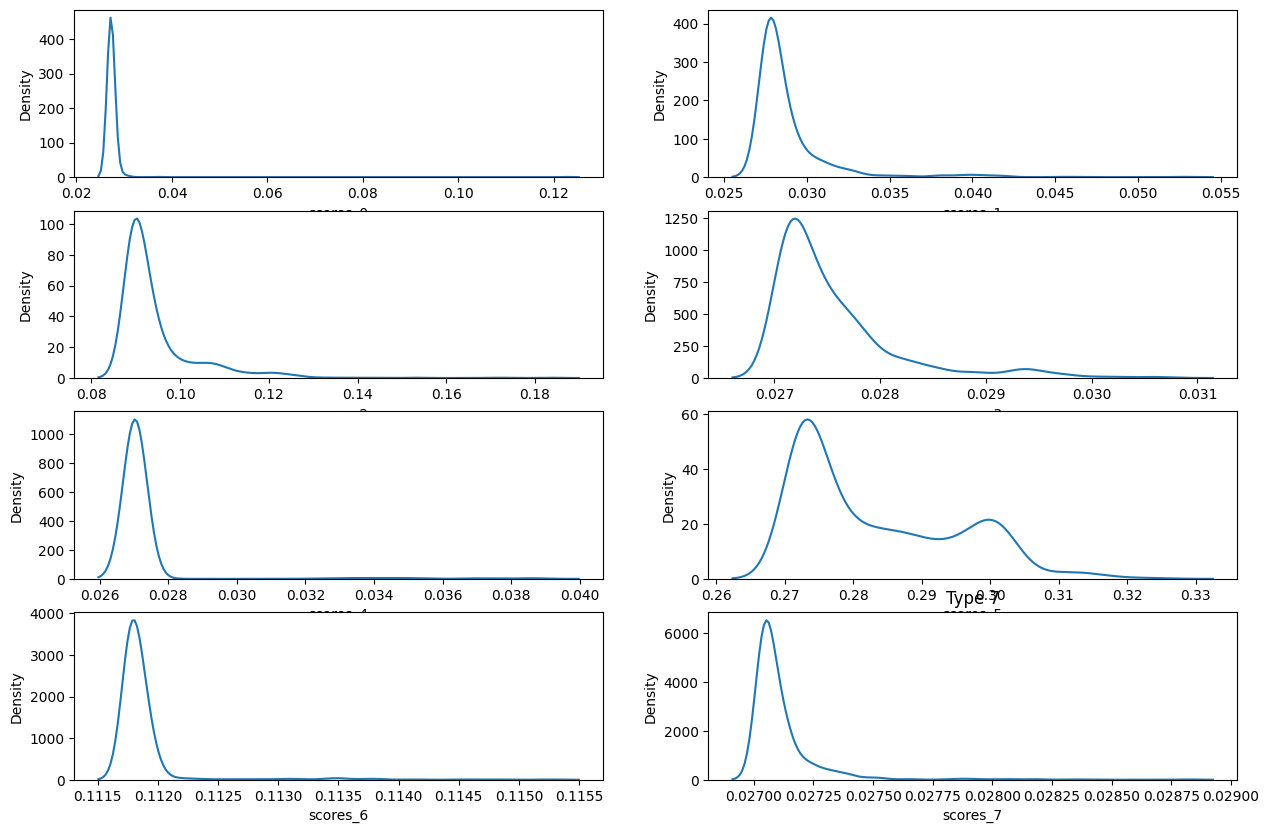

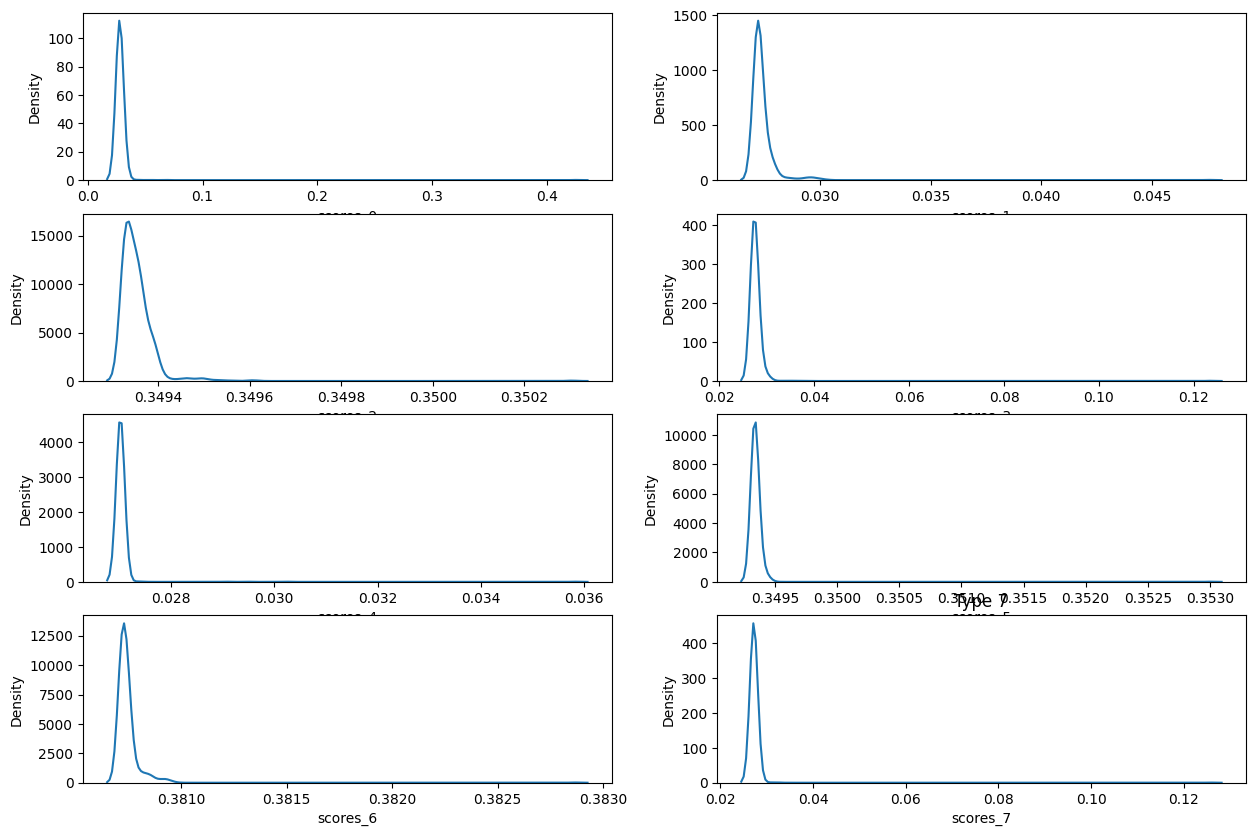

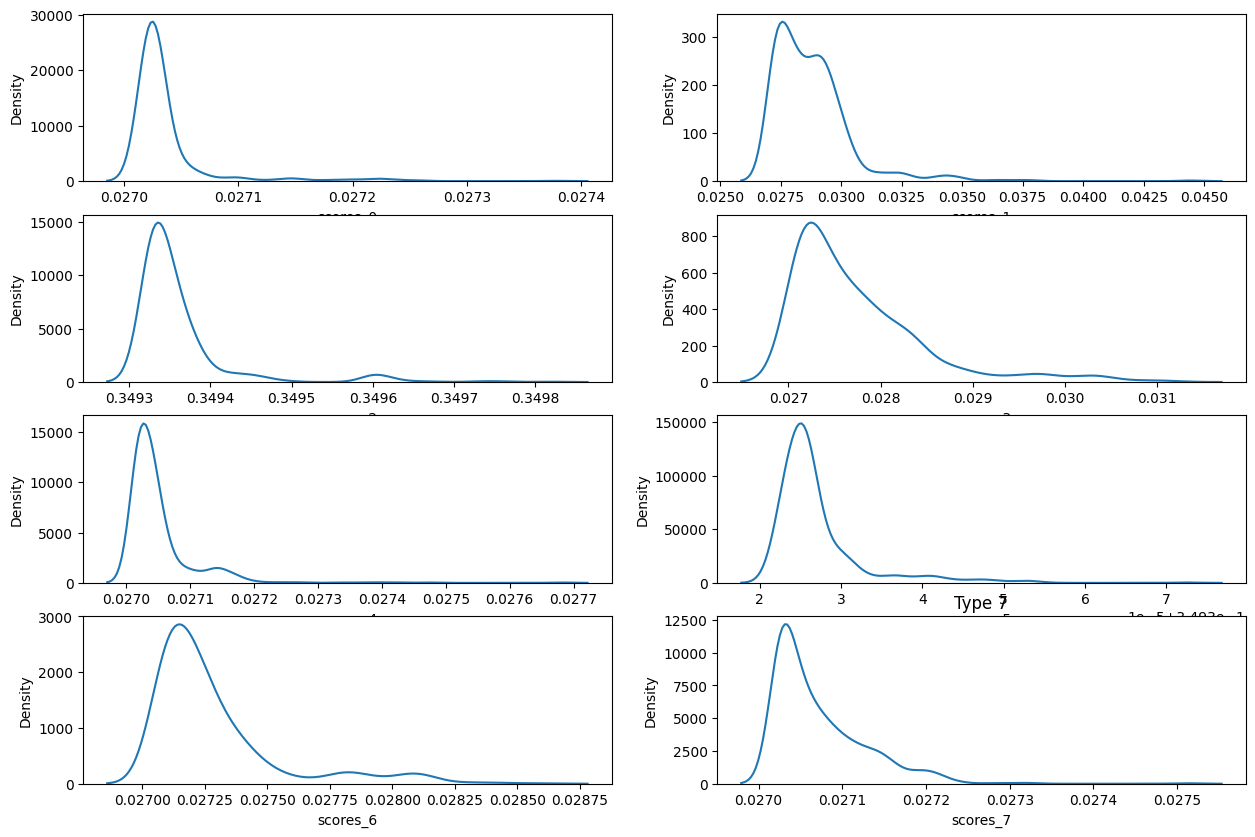

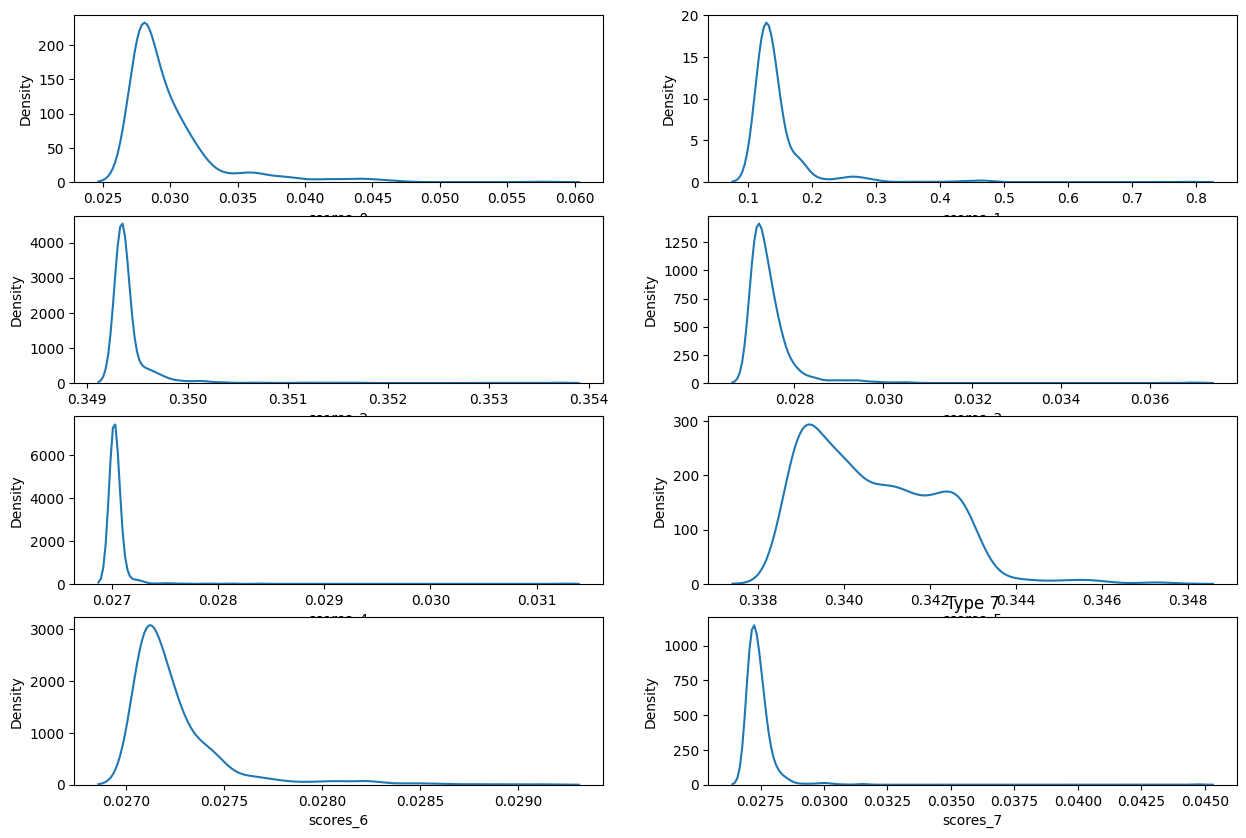

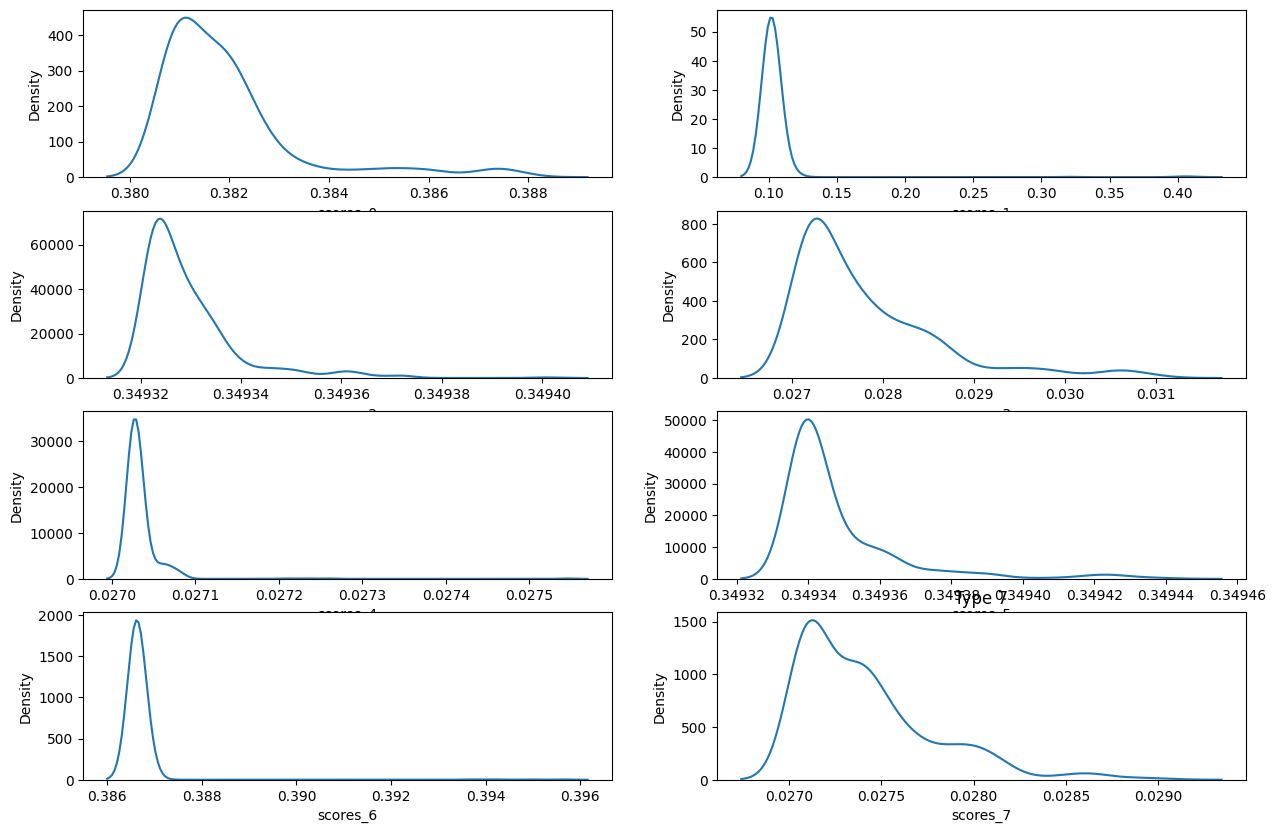

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

for i, df in enumerate(df_container):
    fig = plt.figure(figsize=(15,10))
    for i, col in enumerate(df):
        plt.subplot(4, 2, i+1)
        sns.kdeplot(df[col])
    plt.title(f"Type {i}")

In [31]:
index_0 = df_container[0].sort_values("scores_0", ascending=False).index
index_1 = df_container[2].sort_values("scores_0", ascending=False).index

In [32]:
l1 = index_0[:20].to_list()

In [33]:
l2 = index_1[:20].to_list()

In [34]:
l1

[588,
 723,
 590,
 684,
 697,
 686,
 676,
 722,
 1263,
 616,
 25,
 409,
 695,
 637,
 1248,
 988,
 265,
 69,
 1192,
 427]

In [35]:
l2

[247,
 262,
 239,
 259,
 261,
 252,
 264,
 258,
 250,
 263,
 251,
 257,
 248,
 240,
 255,
 265,
 253,
 249,
 126,
 584]

In [30]:
set(l1) & set(l2)

set()

In [ ]:
sub = pd.read_csv('answer_sample.csv')

sub['label'] = 0
sub.loc[df[df['scores_0']>0.013].index, 'label'] = 1

sub.to_csv('submission.csv', index=False)